In [1]:
# Recurrent Neural Networks
# Usecases for Email auto-completion, sentiment analysis
# These problems are sequence modeling problems,
# The sequence is important

# Why don't we use a simple ANN?
# Consider language translation which is a sequential modeling problem :
# Issue 1 : fixed size of neurons in the layer
# That is, with fixed architecture, we cannot add new neurons for each word
# We can use excess neurons, but that will not be an efficient approach

# Issue 2 : Too much computation
# NNs work on numbers,not strings
# Hence we need to do 1 hot encoding to convert to numbers
# This vectors creation is computationally expensive

# Issue 3 : Parameters are not shared,
# Each time they have to go through layers unnecessarily

# Issue 4 : Sequence of input matters

In [2]:
import pandas as pd
df = pd.read_csv("google.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [4]:
# Ruturaj loves reading
# First input will be Ruturaj
# For the next layer, input will be yRuturaj as well as loves
# Because language needs to carry the context
# There is only 1 hidden layer that goes through this process
# We process one word at a time
# We just do time travel XD
# Incase of feedforward neural networks, where data flows in only 1 direction,
# RNN have connections that loop back on themselves, allowing them to maintain a state or memory of previous inputs

In [5]:
# OPTIONAL
# We can set Date as Index,
# So we can easily organize and manipulate data based on Time
# df = df.set_index(pd.DatetimeIndex(df['Date'].values))

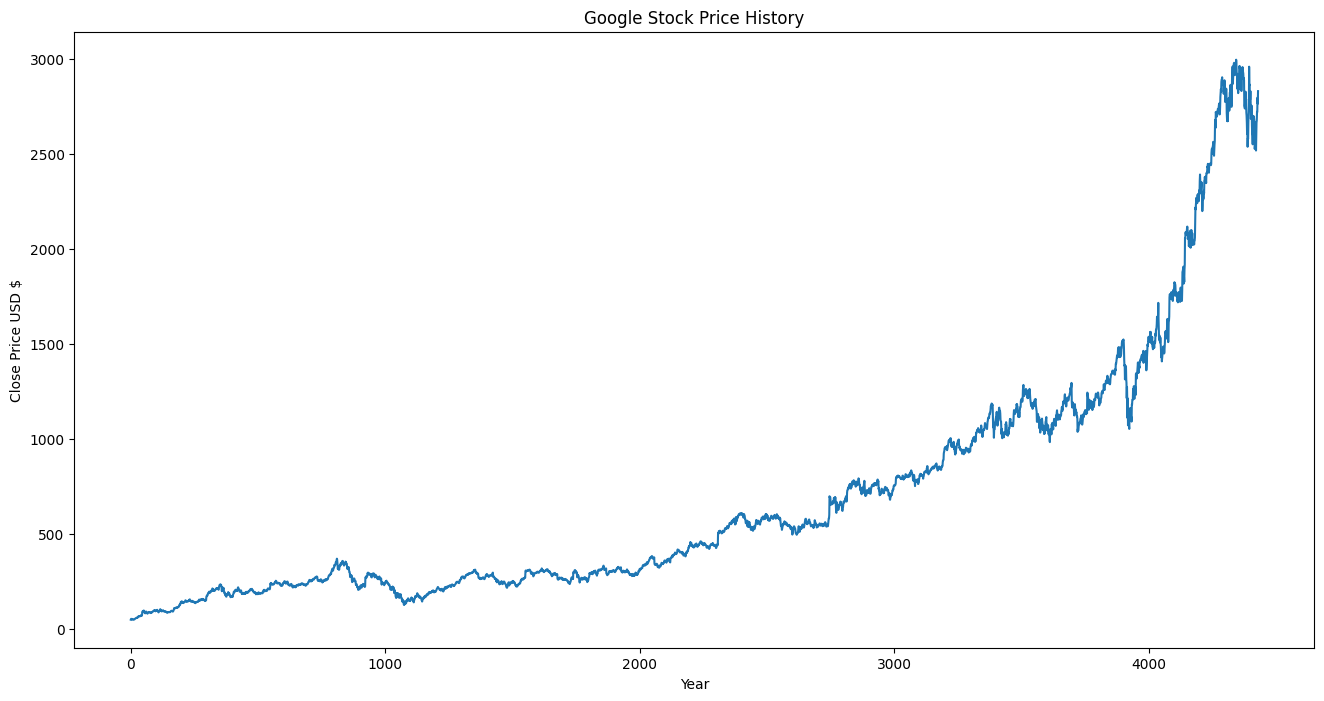

In [6]:
# Visualizing the close price
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.title("Google Stock Price History")
plt.plot(df['Close'])
plt.xlabel('Year')
plt.ylabel('Close Price USD $')
plt.show()

In [7]:
# Create a dataframe from the 'Close' column, which is the column we wish to isolate to predict it
data = df.filter(['Close'])

In [8]:
# Convert the pandas dataframe to numpy array
dataset = data.values

In [9]:
# Normalize the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(dataset)

In [10]:
import numpy as np
# The number of rows for the training dataset
# Here we choose 80% of the rows for training
training_data_len = int(np.ceil(0.8*len(dataset)))

In [11]:
# Create training data

train_data = scaled_data[0:training_data_len,:]

In [12]:
# Define time steps

time_steps = 30

# 30 days data about closing price will be used to predict the closing price of the 31st day
# Hence, we need to prepare X_train as the 30 days data of closing prices,
# And the corresponding Y_train data for these 30 days will be the closing price on 31st day
# Y_train will be the close price immediately following the sequence

In [13]:
X_train =[]
Y_train =[]

for i in range(time_steps, len(train_data)):
  X_train.append(train_data[i-time_steps:i,0])
  Y_train.append(train_data[i,0])

In [14]:
# Convert X_train and Y-train to Numpy arrays :

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [15]:
# Reshape the training data as for LSTM
# It requires 3 parameters :

# Number of sequences in the training data
# Number of Time steps in each sequence
# Number of features at each time step (here it is only 1, the closing price)

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [16]:
# LSTM theory :

# Long Short-Term Memory,
# is a type of RNN architecture,
# designed to capture long-term dependencies and patterns in sequential data.
# Because of vanishing gradient problem, traditional RNNs fail as they can remember only a limited set of data
# LSTM is used for capturing long-range dependencies

# LSTM layer with memory units
# Each memory unit has 3 components :
# 1)Cell state -> long term memory of the cell
# It can selectively retain or discard information over time through gates,
# allowing the network to remember important information and forget irrelevant details.
# 2)Hidden State -> This is the output of the LSTM cell at a particular time step.
# It contains information that the network decides is relevant for making predictions or capturing temporal dependencies in the sequence.
# 3)Gates: LSTM cells have three gates—input gate, forget gate, and output gate—that regulate the flow of information into and out of the cell:
# Input Gate: Controls how much new information is allowed into the cell state.
# Forget Gate: Determines which information from the previous cell state should be discarded or forgotten.
# Output Gate: Modulates the amount of information from the cell state that is passed on to the output or hidden state

In [17]:
# Building the Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
# LSTM layer with 50 memory units

model.add(LSTM(50,return_sequences=False))
# When return_sequences=True,
# the LSTM layer will output a sequence of hidden states for each input time step.
# This is useful when stacking multiple recurrent layers on top of each other,
# as it allows each layer to receive the full sequence of hidden states from the previous layer.

# When return_sequences=False (which is the default behavior if not specified), the LSTM layer will only output the hidden state corresponding to the last time step. This is commonly used in scenarios where you only need the output of the LSTM layer at the final time step,
# such as in sequence-to-vector tasks where the goal is to generate a single output based on the entire input sequence.
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [18]:
model.fit(X_train,Y_train,batch_size=1,epochs=5)

# Process repeats for each batch (1 sample) in the dataset until all batches have been processed, completing one epoch.
# After completing the specified number of epochs (in this case, 5), the training process stops, and the model's parameters are finalized.
# Epochs is how many times the entire dataset is passed through.

Epoch 1/5
3515/3515 [==============================] - 78s 21ms/step - loss: 1.7694e-04
Epoch 2/5
3515/3515 [==============================] - 77s 22ms/step - loss: 8.1722e-05
Epoch 3/5
3515/3515 [==============================] - 59s 17ms/step - loss: 5.8725e-05
Epoch 4/5
3515/3515 [==============================] - 60s 17ms/step - loss: 3.8405e-05
Epoch 5/5
3515/3515 [==============================] - 60s 17ms/step - loss: 3.6053e-05


In [19]:
# Preparing testing data

test_data = scaled_data[training_data_len-time_steps:,:]

In [20]:
X_test = []
Y_test = scaled_data[training_data_len:,:]

for i in range(time_steps,len(test_data)) :
  X_test.append(test_data[i-time_steps:i,0])

In [21]:
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1)) #Reshape for LSTM

In [22]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
# Undo the effects of Normalization

28/28 [==============================] - 1s 10ms/step


In [23]:
# rmse = np.sqrt(np.mean(((predictions-Y_test) ** 2)))
# print(rmse)

<ipython-input-25-b6464895aa4d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['Predictions'] = predictions


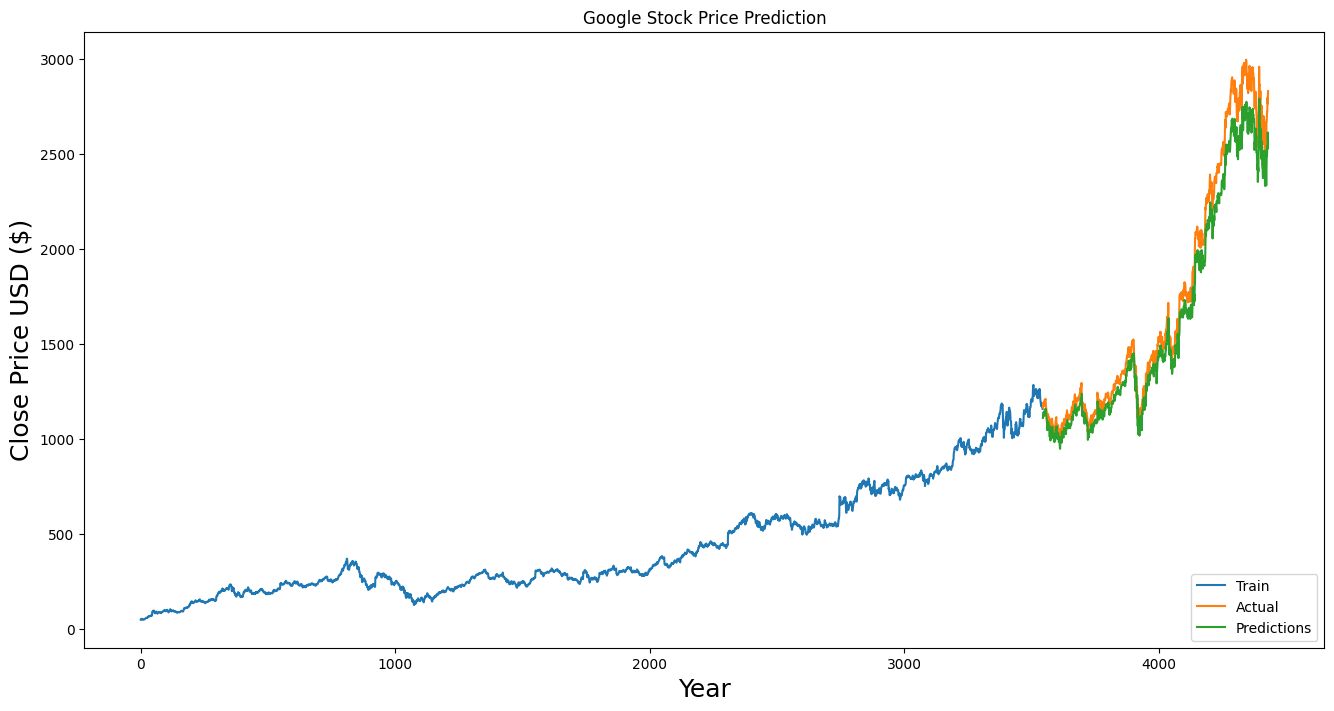

In [25]:
# Plot the data
train = data[:training_data_len]
output = data[training_data_len:]
output['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Google Stock Price Prediction')
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(output[['Close', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()
